In [15]:
import pandas as pd

df_all = pd.concat([
    pd.read_csv("../reports/iso_results.csv"),
    pd.read_csv("../reports/ocsvm_results.csv"),
    pd.read_csv("../reports/autoencoder_results.csv")
], ignore_index=True)

df_all


,model,anomaly_rate,precision,recall,f1,roc_auc,threshold
0,Isolation Forest,0.010,0.0620,0.059730,0.060844,0.599115,NaN
1,Isolation Forest,0.050,0.0308,0.148362,0.051010,0.599115,NaN
2,Isolation Forest,0.100,0.0209,0.201349,0.037869,0.599115,NaN
3,One-Class SVM,0.005,0.0560,0.026975,0.036411,0.522647,-1.489635
4,One-Class SVM,0.010,0.0420,0.040462,0.041217,0.522647,-0.000111
5,One-Class SVM,0.020,0.0265,0.051060,0.034891,0.522647,0.386543
6,Autoencoder,0.005,0.0500,0.024085,0.032510,0.592464,0.005999
7,Autoencoder,0.010,0.0530,0.051060,0.052012,0.592464,0.003962
8,Autoencoder,0.020,0.0385,0.074181,0.050691,0.592464,0.002824


In [16]:
df_all[df_all["anomaly_rate"] == 0.01] \
    .sort_values("f1", ascending=False)


,model,anomaly_rate,precision,recall,f1,roc_auc,threshold
0,Isolation Forest,0.01,0.062,0.059730,0.060844,0.599115,NaN
7,Autoencoder,0.01,0.053,0.051060,0.052012,0.592464,0.003962
4,One-Class SVM,0.01,0.042,0.040462,0.041217,0.522647,-0.000111


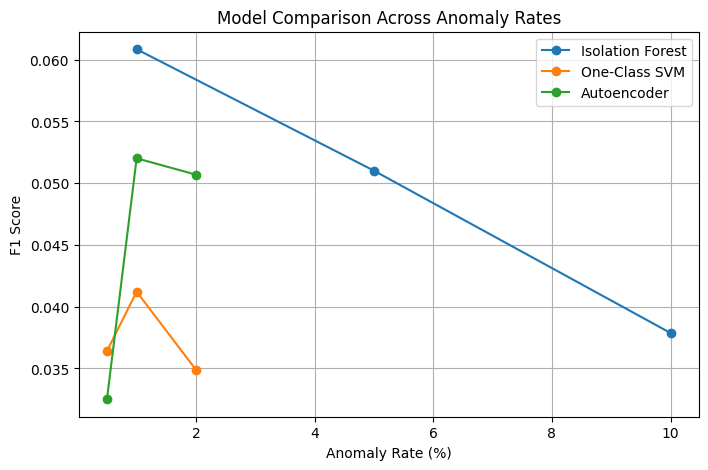

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for model in df_all["model"].unique():
    temp = df_all[df_all["model"] == model]
    plt.plot(
        temp["anomaly_rate"] * 100,
        temp["f1"],
        marker="o",
        label=model
    )

plt.xlabel("Anomaly Rate (%)")
plt.ylabel("F1 Score")
plt.title("Model Comparison Across Anomaly Rates")
plt.legend()
plt.grid(True)
plt.show()


## Model Comparison and Final Selection

All three models were evaluated at a realistic anomaly rate of **1%** using the same feature set and scaling strategy. Performance was compared using Precision, Recall, F1-score, and ROC-AUC.

- **Isolation Forest** achieved the highest F1-score and ROC-AUC, indicating the best balance between precision and recall as well as stronger discriminative capability.
- The **Autoencoder** performed comparably by capturing non-linear patterns through reconstruction error, but showed slightly lower overall metrics.
- **One-Class SVM** exhibited relatively weaker performance and was therefore used as a baseline for comparison.

Based on these observations, **Isolation Forest was selected as the final model** for this anomaly detection task due to its consistent and superior performance at the chosen operating point.
